# Predicting Weather Forecasts with Machine Learning in Python
## Comparisons of Machine Learning Models Using Scikit-learn
---

### Overview
This notebook evaluates the performance of several different scikit-learn supervised machine learning models in predicting weather.

- Programming language: Python
- Tools: scikit-learn and Plotly in Jupyter Notebook
- Objective: to test the ability of machine learning algorithms in predicting the presence of rain tomorrow given other weather metrics. 
- Dataset: daily weather measurements from 2008 to 2017 collected by the Australian Government's Bureau of Meteorology (http://www.bom.gov.au/climate/dwo/).
- Dataset variables (definitions from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml):
    - *Date*: date of the observation (YYYY-MM-DD)
    - *Location*: location of the observation (location)
    - *MinTemp*: minimum temperature (Celsius)
    - *MaxTemp*: maximum temperature (Celsius)
    - *Rainfall*: Amount of rainfall (millimeters)
    - *Evaporation*: Amount of evaporation (millimeters)
    - *Sunshine*: Amount of bright sunshine (hours)
    - *WindGustDir*: Direction of the strongest gust (compass points)
    - *WindGustSpeed*: Speed of the strongest gust (kilometers/hour)
    - *WindDir9am*: Wind direction averaged of 10 minutes prior to 9am (compass points)
    - *WindDir3pm*: Wind direction averaged of 10 minutes prior to 3pm (compass points)
    - *WindSpeed9am*: Wind speed averaged of 10 minutes prior to 9am (kilometers/hour)
    - *WindSpeed3pm*: Wind speed averaged of 10 minutes prior to 3pm (kilometers/hour)
    - *Humidity9am*: Humidity at 9am (percent)
    - *Humidity3pm*: Humidity at 3pm (percent)
    - *Pressure9am*: Atmospheric pressure reduced to mean sea level at 9am (Hectopascal)
    - *Pressure3pm*: Atmospheric pressure reduced to mean sea level at 3pm (Hectopascal)
    - *Cloud9am*: Fraction of the sky obscured by cloud at 9am (eights)
    - *Cloud3pm*: Fraction of the sky obscured by cloud at 3pm (eights)
    - *Temp9am*: Temperature at 9am (Celsius)
    - *Temp3pm*: Temperature at 3pm (Celsius)
    - *RainToday*: If there was rain today (yes/no)
    - *RainTomorrow*: If there is rain tomorrow (yes/no)
- This project was initially completed as part of Coursera's IBM "Machine Learning with Python" honors curriculum. I independently rewrote, refined, and extended the project by adding additional code, analyses, and visualizations.

---
### Table of Contents
- [Set Up](#setup)
- [Data Exploration](#dexplore)
- [Data Preprocessing](#dprocess)
- [Machine Learning Analyses](#ML)
    - [Logistic Regression](#LogReg)
    - [Logistic Regression with PCA](#LogRegPCA)
    - [K-Nearest Neighbor Classifier](#KNN)
    - [Decision Tree Classifier](#Tree)
    - [Support Vector Machine](#SVM)
- [Conclusion](#Metrics)
- [Addendum: Linear Regression](#LinearReg)

--- 
<a name="setup"></a>
### Set Up
#### Import Libraries
Load the necessary libraries and suppress warnings.

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
# import libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import jaccard_score, f1_score, log_loss, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics as metrics
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio

#### Import Data
Load the weather dataset.

In [3]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'
df = pd.read_csv(path)

---
<a name="dexplore"></a>
### Data Exploration
Find the size, variable types, and descriptive statistics of the dataset.

In [4]:
# find the size of dataset
print("There are currently {:,.0f}".format(df.shape[0]), "rows and", df.shape[1], "variables in this dataset.")

There are currently 3,271 rows and 22 variables in this dataset.


In [5]:
# load the first five rows of the dataset
df.head()

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0  2/1/2008     19.5     22.4      15.6          6.2       0.0           W   
1  2/2/2008     19.5     25.6       6.0          3.4       2.7           W   
2  2/3/2008     21.6     24.5       6.6          2.4       0.1           W   
3  2/4/2008     20.2     22.8      18.8          2.2       0.0           W   
4  2/5/2008     19.7     25.7      77.4          4.8       0.0           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  Humidity3pm  \
0             41          S        SSW  ...           92           84   
1             41          W          E  ...           83           73   
2             41        ESE        ESE  ...           88           86   
3             41        NNE          E  ...           83           90   
4             41        NNE          W  ...           88           74   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1017.6       1017.4         8         8     20.7     20.9        Yes   
1       1017.9       1016.4         7         7     22.4     24.8        Yes   
2       1016.7       1015.6         7         8     23.5     23.0        Yes   
3       1014.2       1011.8         8         8     21.4     20.9        Yes   
4       1008.3       1004.8         8         8     22.5     25.5        Yes   

   RainTomorrow  
0           Yes  
1           Yes  
2           Yes  
3           Yes  
4           Yes  

[5 rows x 22 columns]

In [6]:
# find the variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

In [7]:
# descriptive statistics for all variables
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  3271.000000  3271.000000  3271.000000  3271.000000  3271.000000   
mean     14.877102    23.005564     3.342158     5.175787     7.168970   
std       4.554710     4.483752     9.917746     2.757684     3.815966   
min       4.300000    11.700000     0.000000     0.000000     0.000000   
25%      11.000000    19.600000     0.000000     3.200000     4.250000   
50%      14.900000    22.800000     0.000000     4.800000     8.300000   
75%      18.800000    26.000000     1.400000     7.000000    10.200000   
max      27.600000    45.800000   119.400000    18.400000    13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    3271.000000   3271.000000   3271.000000  3271.000000  3271.000000   
mean       41.476307     15.077041     19.294405    68.243962    54.698563   
std        10.806951      7.043825      7.453331    15.086127    16.279241   
min        17.000000      0.000000      0.000000    19.000000    10.000000   
25%        35.000000     11.000000     15.000000    58.000000    44.000000   
50%        41.000000     15.000000     19.000000    69.000000    56.000000   
75%        44.000000     20.000000     24.000000    80.000000    64.000000   
max        96.000000     54.000000     57.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  3271.000000  3271.000000  3271.000000  3271.000000  3271.000000   
mean   1018.334424  1016.003085     4.318557     4.176093    17.821461   
std       7.020090     7.019915     2.526923     2.411274     4.894316   
min     986.700000   989.800000     0.000000     0.000000     6.400000   
25%    1013.700000  1011.300000     2.000000     2.000000    13.800000   
50%    1018.600000  1016.300000     5.000000     4.000000    18.200000   
75%    1023.100000  1020.800000     7.000000     7.000000    21.700000   
max    1039.000000  1036.700000     9.000000     8.000000    36.500000   

           Temp3pm  
count  3271.000000  
mean     21.543656  
std       4.297053  
min      10.200000  
25%      18.400000  
50%      21.300000  
75%      24.500000  
max      44.700000

We can graph the the "Rain Tomorrow" variable using a pie chart to get an idea of its distribution of values.

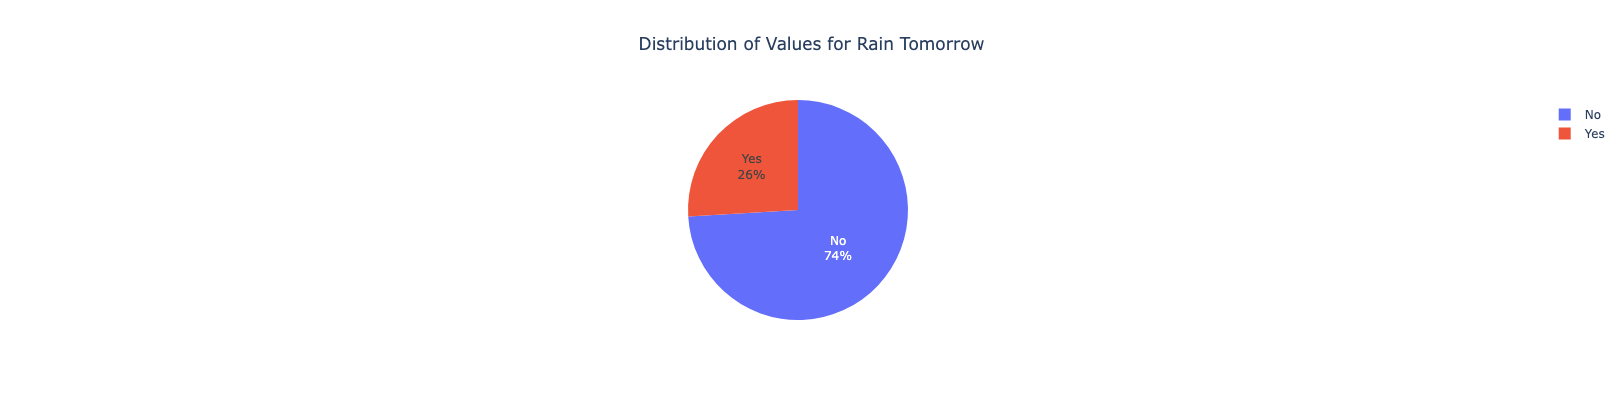

count
RainTomorrow       
No             2422
Yes             849

In [8]:
# Create a pie chart with the distribution of values for the "RainTomorrow" target variable
RainTomorrow_distr = pd.DataFrame(df['RainTomorrow'].value_counts())
fig = px.pie(RainTomorrow_distr, 
             values='count', 
             names=RainTomorrow_distr.index, 
             width = 400,
             height = 400,
             title='Distribution of Values for Rain Tomorrow')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_x=0.5)
fig.show()

pd.DataFrame(df['RainTomorrow'].value_counts())

There are 849 "yes" values for the "RainTomorrow" variable, which is 26% of the dataset. There are 2,422 "no" values, which is 74% of the dataset. Since we are interested in predicting the "RainTomorrow" variable using machine learning classifiers, this indicates there are a large number of values to work with in each category of the variable.

---
<a name="dprocess"></a>
### Preprocess Data
Define variables of interest, format data, and create train/test sets for machine learning analyses.

#### Define Variables of Interest

In [9]:
# convert the target variable "RainTomorrow" to binary variable in one column.
df.RainTomorrow.replace(['No', 'Yes'], [0,1], inplace=True)

In [10]:
# define variables for analysis and drop the "Date" variable
X_raw = df.drop(columns=['RainTomorrow','Date'], axis=1)
Y = df['RainTomorrow']

#### Perform One Hot Encoding
Convert categorical variables to binary variables with one hot encoding.

In [11]:
columns_numeric=list(X_raw.select_dtypes('float64').columns) + list(X_raw.select_dtypes('int64').columns)
columns_categorical=list(X_raw.select_dtypes('object').columns)

X = pd.get_dummies(data=X_raw, columns=columns_categorical)

#### Splitting Data into Train/Test Sets

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [13]:
print ('Train set:', 'X_train has dimensions', X_train.shape, '; Y_train has dimensions', Y_train.shape)
print ('Test set:', 'X_test has dimensions', X_test.shape, '; Y_test has dimensions', Y_test.shape)

Train set: X_train has dimensions (2616, 66) ; Y_train has dimensions (2616,)
Test set: X_test has dimensions (655, 66) ; Y_test has dimensions (655,)


#### Normalization 
Normalize data for better results.

In [14]:
scaler = ColumnTransformer([
    ('Numeric_Scaler', StandardScaler(), columns_numeric)], remainder='passthrough')

X_train_processed = scaler.fit(X_train).transform(X_train)
X_test_processed = scaler.transform(X_test)

---
<a name="ML"></a>
### Machine Learning Analyses
Supervised machine learning algorithms can be applied to predict the occurrence of rain tomorrow. 

All machine learning models are trained on the training set ("X_train_processed" and "Y_train") and tested on the testing set ("X_test_processed" and "Y_test").

#### Logistic Regression<a name="LogReg"></a>

Logistic regression is typically used with categorical dependent variables. As linear regression is primarily used with a continuous dependent variable, logistic regression is a more appropriate analytical method for the current dataset when predicting the presence or absence of rain in the forecast. The model is first fit, then used to predict values and probabilities for the dependent variable.

In [15]:
# fit model and create predictions
LogisticReg_model = LogisticRegression(solver='liblinear').fit(X_train_processed, Y_train)
LogisticReg_predictions = LogisticReg_model.predict(X_test_processed)
LogisticReg_predict_proba = LogisticReg_model.predict_proba(X_test_processed)

The model is then evaluated using performance metrics that include accuracy, Jaccard Index, F1 Score, and Log Loss.

In [16]:
# evaluation metrics
LogisticReg_Accuracy_Score = accuracy_score(Y_test, LogisticReg_predictions)
LogisticReg_JaccardIndex = jaccard_score(Y_test, LogisticReg_predictions, pos_label=1)
LogisticReg_F1_Score = f1_score(Y_test, LogisticReg_predictions)
LogisticReg_Log_Loss = log_loss(Y_test, LogisticReg_predict_proba)

# create metrics report 
LogisticRegression_Report = pd.DataFrame(
    {'Metrics' : ['Accuracy Score', 'Jaccard Index', 'F1 Score', 'Log Loss'], 
     'Results': [LogisticReg_Accuracy_Score, LogisticReg_JaccardIndex, LogisticReg_F1_Score,LogisticReg_Log_Loss]})
LogisticRegression_Report.set_index('Metrics', inplace=True)
LogisticRegression_Report

Results
Metrics                 
Accuracy Score  0.839695
Jaccard Index   0.524887
F1 Score        0.688427
Log Loss        0.356232

A confusion matrix can be created to show the model's predictions, where 0 = no rain and 1 = rain.

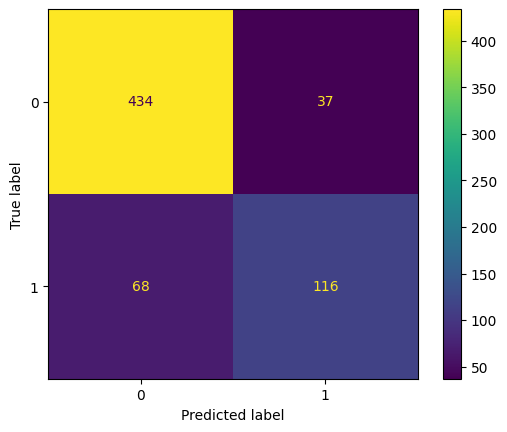

In [17]:
# display confusion matrix
confusion_matrix_fit = confusion_matrix(Y_test, LogisticReg_predictions)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix_fit).plot()

#### Logistic Regression with PCA <a name="LogRegPCA"></a>

PCA is a linear technique that can reduce the dimensionality of data. Since the logistic regression model is predicting a binary dependent variable using a large number of independent variables, PCA may be used in conjunction with this classifier to help improve accuracy metrics. 

To start, the correlations between all independent variables are visualized for a rough assessment of multicollinearity, which would support the use of PCA.

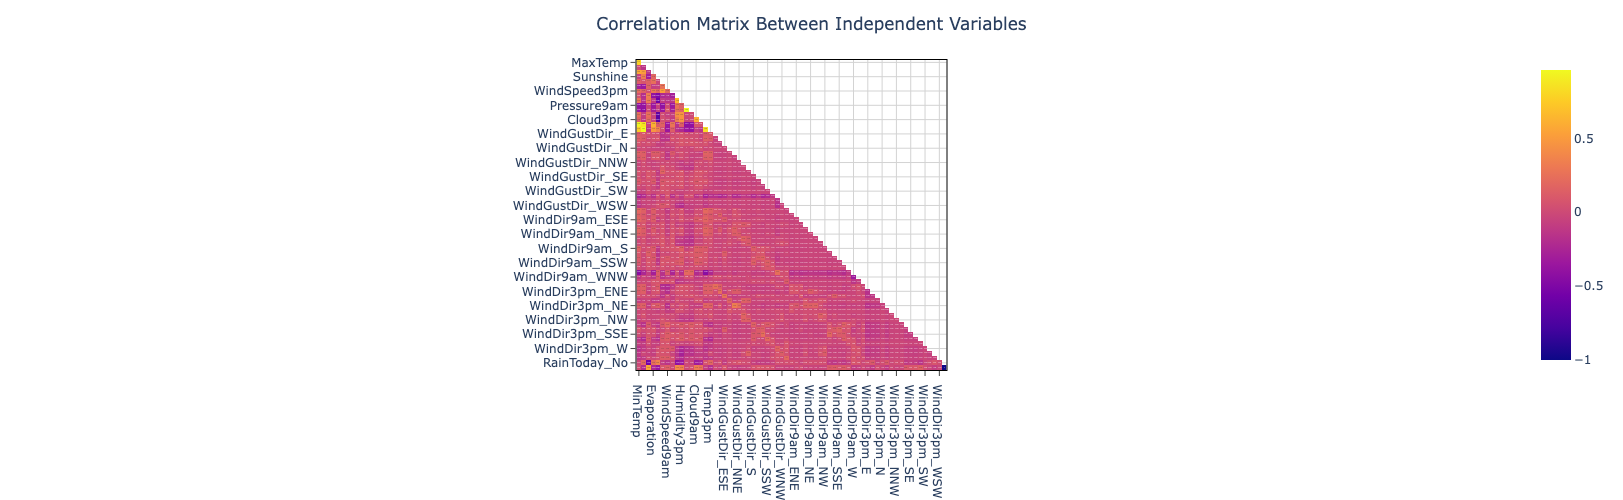

In [18]:
X_rvalues = X.corr().round(3)
matrix_mask = np.zeros_like(X_rvalues, dtype=bool)
matrix_mask[np.triu_indices_from(matrix_mask)]=True

X_rmatrix = X_rvalues.mask(matrix_mask).dropna(how='all').dropna(axis='columns', how='all')
fig = px.imshow(X_rmatrix, 
                height = 500,
                width = 550,
                text_auto=True)

fig.update_layout(
    plot_bgcolor='white')

fig.update_xaxes(
    showline=True,
    linecolor='black',
    gridcolor='lightgray',
    mirror=True,
    ticks='outside')

fig.update_yaxes(
    showline=True,
    linecolor='black',
    gridcolor='lightgray',
    mirror=True,
    ticks='outside')

fig.update_layout(title="Correlation Matrix Between Independent Variables", title_x=0.5)
fig.show()

The top 10 negative and positive correlations between independent variables are listed below.

In [19]:
sorted_matrix = X_rmatrix.unstack().sort_values()
sorted_matrix.replace([1, -1], np.nan, inplace=True)
sorted_matrix = sorted_matrix.dropna()

negative_corr = pd.DataFrame(sorted_matrix.head(10))
negative_corr.columns = {'Correlation Value'}

positive_corr = pd.DataFrame(sorted_matrix.tail(10).sort_values(ascending=False))
positive_corr.columns = {'Correlation Value'}
print('\nTop 10 Negative Correlations\n', negative_corr,'\n\n')
print('Top 10 Positive Correlations\n', positive_corr,'\n')


Top 10 Negative Correlations
                             Correlation Value
Sunshine      Cloud3pm                 -0.678
              Cloud9am                 -0.665
              Humidity3pm              -0.586
Rainfall      RainToday_No             -0.557
Sunshine      Humidity9am              -0.491
Temp9am       WindDir9am_W             -0.438
MinTemp       WindDir9am_W             -0.435
MaxTemp       Pressure3pm              -0.420
Pressure9am   Temp9am                  -0.417
WindGustSpeed Pressure9am              -0.409 


Top 10 Positive Correlations
                          Correlation Value
Pressure9am Pressure3pm              0.963
MaxTemp     Temp3pm                  0.961
MinTemp     Temp9am                  0.939
MaxTemp     Temp9am                  0.859
Temp9am     Temp3pm                  0.828
MinTemp     MaxTemp                  0.771
            Temp3pm                  0.753
Humidity9am Humidity3pm              0.658
Evaporation Temp9am                  0.606


There are strong correlations between multiple independent variables, which supports the use of PCA.

To implement the PCA analysis, the number of PCA components needs to be determined. The number of PCA components are graphed to find an optimal explained variance level. In this instance, this analysis will use the number of PCA components that accounts for 95% explained variance.

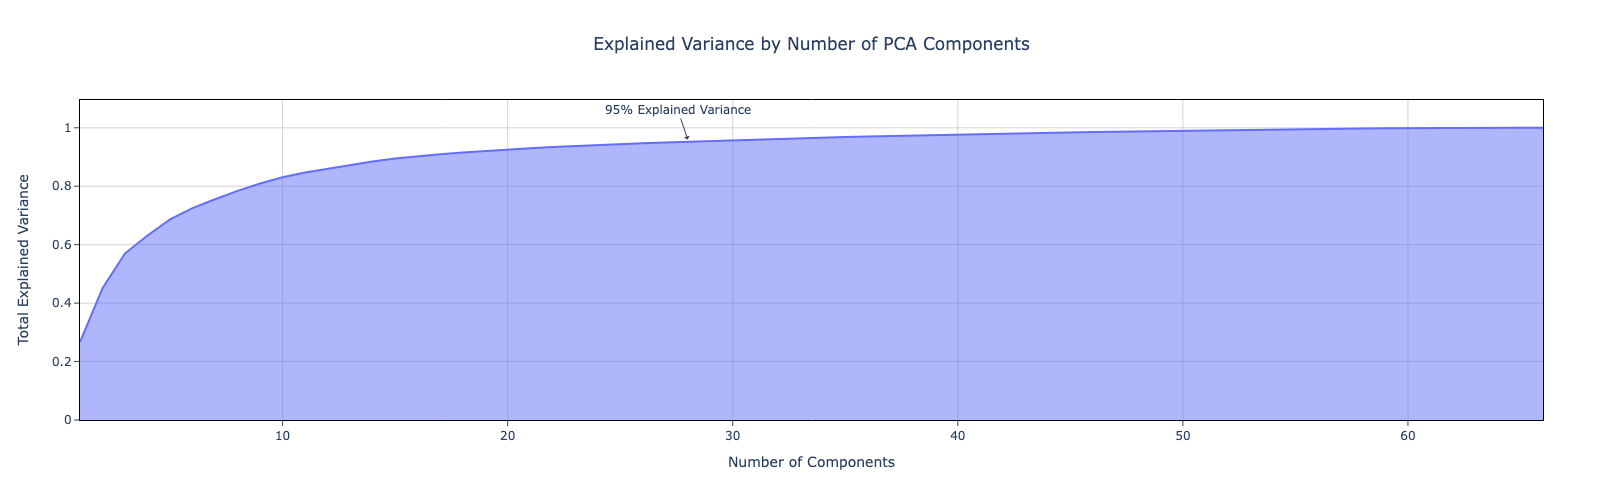

In [20]:
# find number of PCA components to use
pca_components = PCA(svd_solver='auto').fit(X_train_processed)
pca_variance = np.cumsum(pca_components.explained_variance_ratio_)

fig = px.area(
    x=range(1, pca_variance.shape[0] + 1),
    y=pca_variance,
    title="Explained Variance by Number of PCA Components",
    labels={"x": "Number of Components", "y": "Total Explained Variance"},
    height=500)

fig.add_annotation(x=28, y=0.96,
            text="95% Explained Variance",
            showarrow=True,
            arrowhead=1,
            xanchor="center")

fig.update_layout(
    plot_bgcolor='white')

fig.update_xaxes(
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    mirror=True,
    ticks='outside')

fig.update_yaxes(
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    mirror=True,
    ticks='outside')

fig.update_layout(title_x=0.5)

fig.show()

This PCA analysis results in 28 components needed to find 95% explained variance.

To visualize the PCA loadings, the components of the PCA are graphed.

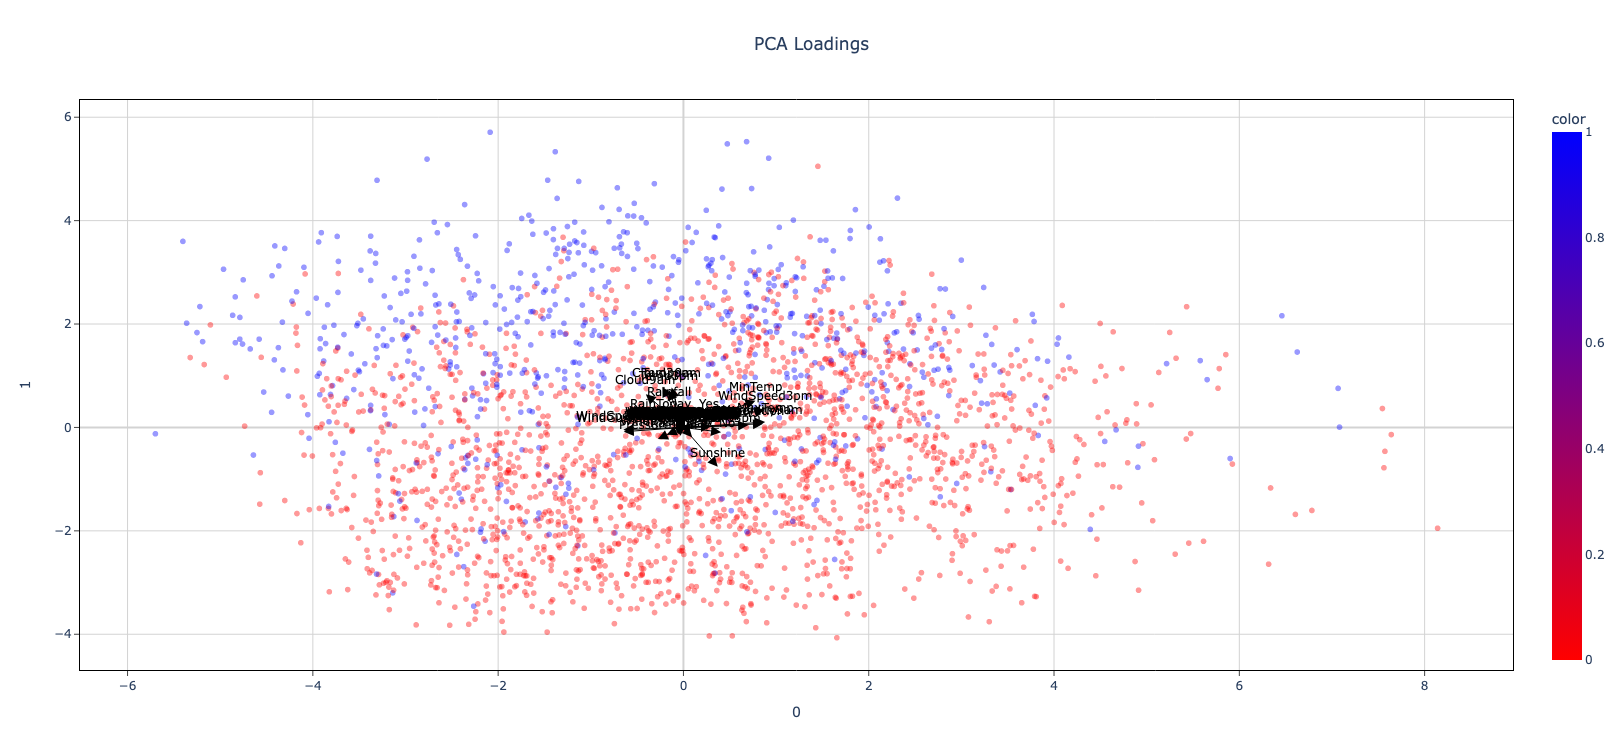

In [21]:
# visualize PCA loadings
PCA_28model_visualization = PCA(svd_solver='auto', n_components=28)
PCA_28model_components = PCA_28model_visualization.fit_transform(X_train_processed)

PCA_loadings = PCA_28model_visualization.components_.T * np.sqrt(PCA_28model_visualization.explained_variance_)

color_for_markers = ["red", "blue"]

fig = px.scatter(PCA_28model_components, 
                 x=0, 
                 y=1, 
                 title="PCA Loadings",
                 color=Y_train, opacity=0.4,
                 color_continuous_scale=px.colors.sequential.Bluered_r,
                 height=750)

for i, feature in enumerate(X_train):
    fig.add_annotation(
        x=PCA_loadings[i, 0],
        y=PCA_loadings[i, 1],
        ax=0, ay=0,
        axref="x", ayref="y",
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        arrowcolor='black',
        xanchor="right",
        yanchor="top")
    
    fig.add_annotation(
        x=PCA_loadings[i, 0],
        y=PCA_loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        font=dict(color="black"),
        yshift=5)

fig.update_layout(
    plot_bgcolor='white')

fig.update_xaxes(
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    zerolinecolor= 'lightgrey',
    mirror=True,
    ticks='outside')

fig.update_yaxes(
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    zerolinecolor= 'lightgrey',
    mirror=True,
    ticks='outside')

fig.update_layout(title_x=0.5)

fig.show()

In [22]:
# fit model and create predictions
PCA_28model = PCA(svd_solver='auto', n_components=28)
LReg_model = LogisticRegression(solver='liblinear') 

PCA_LR_pipeline = Pipeline([('PCA_28_component_model', PCA_28model), ('Logistic_Regression', LReg_model)])
PCA_LR_pipeline.fit(X_train_processed, Y_train)
LogisticReg_PCA_predictions = PCA_LR_pipeline.predict(X_test_processed)
LogisticReg_PCA_predict_proba = PCA_LR_pipeline.predict_proba(X_test_processed)

In [23]:
# evaluation metrics
LogisticReg_PCA_Accuracy_Score = accuracy_score(Y_test, LogisticReg_PCA_predictions)
LogisticReg_PCA_JaccardIndex = jaccard_score(Y_test, LogisticReg_PCA_predictions, pos_label=1)
LogisticReg_PCA_F1_Score = f1_score(Y_test, LogisticReg_PCA_predictions)
LogisticReg_PCA_Log_Loss = log_loss(Y_test, LogisticReg_PCA_predict_proba)

# create metrics report 
LogisticRegression_PCA_Report = pd.DataFrame(
    {'Metrics' : ['Accuracy Score', 'Jaccard Index', 'F1 Score', 'Log Loss'], 
     'Results': [LogisticReg_PCA_Accuracy_Score, LogisticReg_PCA_JaccardIndex, LogisticReg_PCA_F1_Score,LogisticReg_PCA_Log_Loss]})
LogisticRegression_PCA_Report.set_index('Metrics', inplace=True)
LogisticRegression_PCA_Report

Results
Metrics                 
Accuracy Score  0.833588
Jaccard Index   0.504545
F1 Score        0.670695
Log Loss        0.357576

A confusion matrix can be created to show the model's predictions, where 0 = no rain and 1 = rain.

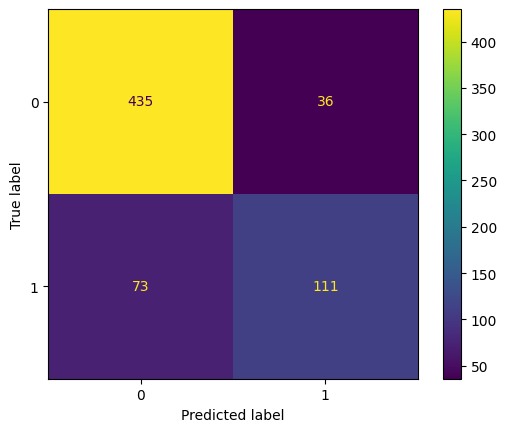

In [24]:
# display confusion matrix
confusion_matrix_fit = confusion_matrix(Y_test, LogisticReg_PCA_predictions)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix_fit).plot()

#### K-Nearest Neighbors Classifier <a name="KNN"></a>

K-nearest neighbors algorithms can classify data based their similarity to the k nearest training examples. As with the logistic regression models, the k-nearest neighbors model is first trained on the training dataset and then evaluated on its performance in predicting tomorrow's weather.

In [25]:
# fit model and create predictions
KNN = KNeighborsClassifier(n_neighbors=4).fit(X_train_processed, Y_train)
KNN_predictions = KNN.predict(X_test_processed)

In [26]:
# evaluation metrics
KNN_Accuracy_Score = accuracy_score(Y_test, KNN_predictions)
KNN_JaccardIndex = jaccard_score(Y_test, KNN_predictions, pos_label=1)
KNN_F1_Score = f1_score(Y_test, KNN_predictions)

# create metrics report 
KNN_Report = pd.DataFrame(
    {'Metrics' : ['Accuracy Score', 'Jaccard Index', 'F1 Score'], 
     'Results': [KNN_Accuracy_Score, KNN_JaccardIndex, KNN_F1_Score]})
KNN_Report.set_index('Metrics', inplace=True)
KNN_Report

Results
Metrics                 
Accuracy Score  0.809160
Jaccard Index   0.387255
F1 Score        0.558304

A confusion matrix can be created to show the model's predictions, where 0 = no rain and 1 = rain.

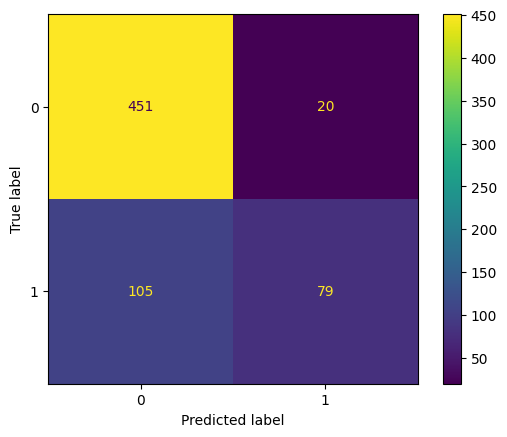

In [27]:
# display confusion matrix
confusion_matrix_fit = confusion_matrix(Y_test, KNN_predictions)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix_fit).plot()

#### Decision Tree Classifier <a name="Tree"></a>

Decision tree algorithms classify cases using a tree-like structure to predict outcomes, which is formed through an iterative process of assessing each independent variable and parsing the data based on that feature to find the most predictive attributes. In this example, the classifier is fit to the training data followed by evaluation of its predictive accuracy.

In [28]:
# fit model and create predictions
DTree = DecisionTreeClassifier().fit(X_train_processed, Y_train)
DTree_predictions = DTree.predict(X_test_processed)

In [29]:
# evaluation metrics
DTree_Accuracy_Score = accuracy_score(Y_test, DTree_predictions)
DTree_JaccardIndex = jaccard_score(Y_test, DTree_predictions, pos_label=1)
DTree_F1_Score = f1_score(Y_test, DTree_predictions)

# create metrics report 
DTree_Report = pd.DataFrame(
    {'Metrics' : ['Accuracy Score', 'Jaccard Index', 'F1 Score'], 
     'Results': [DTree_Accuracy_Score, DTree_JaccardIndex, DTree_F1_Score]})
DTree_Report.set_index('Metrics', inplace=True)
DTree_Report

Results
Metrics                 
Accuracy Score  0.757252
Jaccard Index   0.400000
F1 Score        0.571429

A confusion matrix can be created to show the model's predictions, where 0 = no rain and 1 = rain.

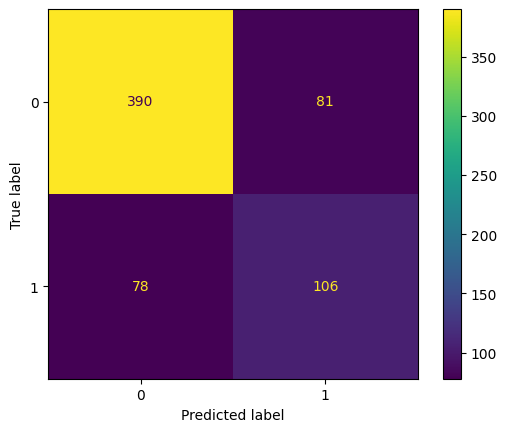

In [30]:
# display confusion matrix
confusion_matrix_fit = confusion_matrix(Y_test, DTree_predictions)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix_fit).plot()

#### Support Vector Machine Classifier <a name="SVM"></a>

Support vector machine algorithms classify data by transforming the dataset into a high dimensional feature space and finding a separator (i.e., a hyperplane) to linearly categorize cases. Here, the classifier is first trained on the testing set, then assessed for its accuracy.

In [31]:
# fit model and create predictions
SVM = svm.SVC().fit(X_train_processed, Y_train)
SVM_predictions = SVM.predict(X_test_processed)

In [32]:
# evaluation metrics
SVM_Accuracy_Score = accuracy_score(Y_test, SVM_predictions)
SVM_JaccardIndex = jaccard_score(Y_test, SVM_predictions)
SVM_F1_Score = f1_score(Y_test, SVM_predictions)

# create metrics report
SVM_Report = pd.DataFrame(
    {'Metrics' : ['Accuracy Score', 'Jaccard Index', 'F1 Score'], 
     'Results': [SVM_Accuracy_Score, SVM_JaccardIndex, SVM_F1_Score]})
SVM_Report.set_index('Metrics', inplace=True)
SVM_Report

Results
Metrics                 
Accuracy Score  0.833588
Jaccard Index   0.480952
F1 Score        0.649518

A confusion matrix can be created to show the model's predictions, where 0 = no rain and 1 = rain.

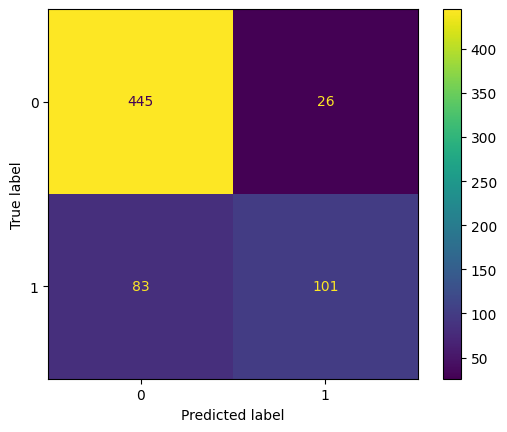

In [33]:
# display confusion matrix
confusion_matrix_fit = confusion_matrix(Y_test, SVM_predictions)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix_fit).plot()

### Conclusion: Comparison of Metrics <a name="Metrics"></a>

We can create a table to assess the accuracy of different machine learning model and compare their performance metrics.

In [34]:
Overall_Report = pd.DataFrame

Overall_Report = pd.DataFrame({
    'Model': ['K-Nearest Neighbors','Decision Tree', 'Support Vector Machine', 'Logistic Regression without PCA', 'Logistic Regression with PCA'], 
    'Accuracy': [KNN_Accuracy_Score, DTree_Accuracy_Score, SVM_Accuracy_Score, LogisticReg_Accuracy_Score, LogisticReg_PCA_Accuracy_Score], 
    'Jaccard Index': [KNN_JaccardIndex, DTree_JaccardIndex, SVM_JaccardIndex, LogisticReg_JaccardIndex, LogisticReg_PCA_JaccardIndex],
    'F1 Score': [KNN_F1_Score, DTree_F1_Score, SVM_F1_Score, LogisticReg_F1_Score, LogisticReg_PCA_F1_Score],
    'Log Loss': ['NA', 'NA', 'NA', LogisticReg_Log_Loss, LogisticReg_PCA_Log_Loss] })
Overall_Report.set_index('Model', inplace=True)
Overall_Report

Accuracy  Jaccard Index  F1 Score  Log Loss
Model                                                                       
K-Nearest Neighbors              0.809160       0.387255  0.558304        NA
Decision Tree                    0.757252       0.400000  0.571429        NA
Support Vector Machine           0.833588       0.480952  0.649518        NA
Logistic Regression without PCA  0.839695       0.524887  0.688427  0.356232
Logistic Regression with PCA     0.833588       0.504545  0.670695  0.357576

We can also visualize the accuracy of different models with a bar chart.

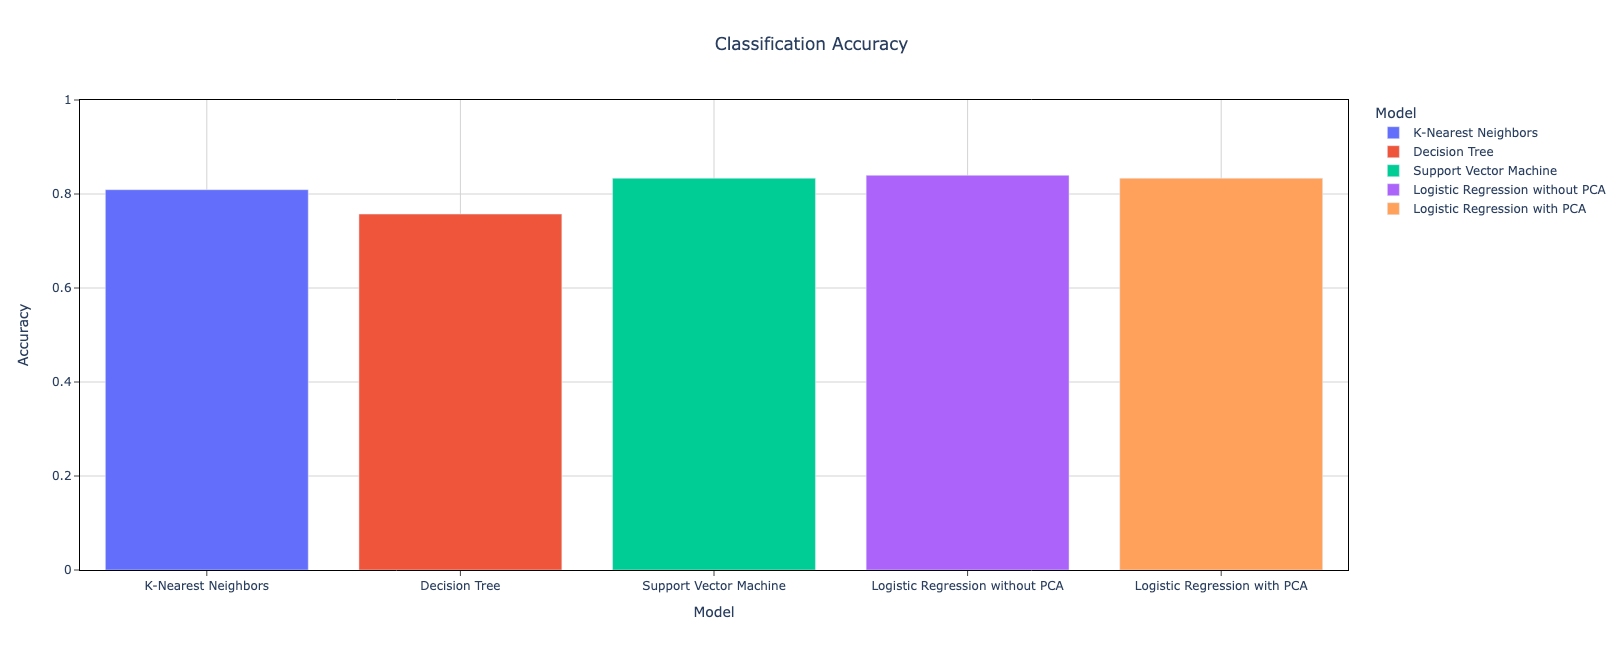

In [35]:
# Plot bar chart
fig = px.bar(Overall_Report, x=Overall_Report.index, y='Accuracy',
            color=Overall_Report.index,
            title="Classification Accuracy",
            height = 650)

fig.update_layout(
    plot_bgcolor='white')

fig.update_xaxes(
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    mirror=True,
    ticks='outside')

fig.update_yaxes(
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    mirror=True,
    ticks='outside')

fig.update_yaxes(range=[0, 1])
fig.update_layout(title_x=0.5)
fig.show()

We see that the the logistic regression models and the support vector machine model all perform similarly, with the logistic regression model without PCA performing slightly better than the other models. The models for logistic regression with PCA and support vector machine follow closely behind in terms of accuracy.

We can visualize performance metrics as well by plotting them as a bar chart. We will plot the Jaccard index and F1 score as all five models can be evaluated by these metrics.

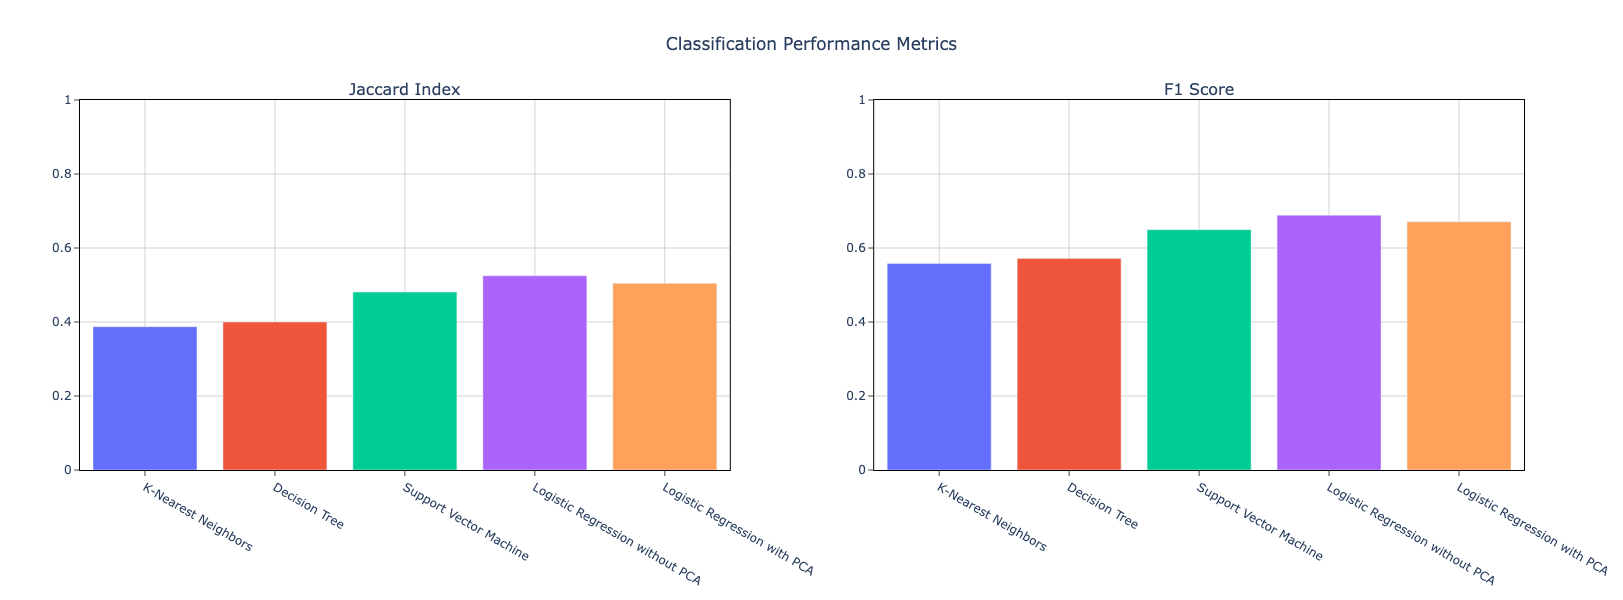

In [36]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=('Jaccard Index', 'F1 Score'))
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']

fig.add_trace(
    go.Bar(x=Overall_Report.index, y=Overall_Report['Jaccard Index'],
          marker_color=colors, name=""),
    row=1, col=1)

fig.add_trace(
    go.Bar(x=Overall_Report.index, y=Overall_Report['F1 Score'],
           marker_color=colors, name=""),
    row=1, col=2)

fig.update_layout(
    plot_bgcolor='white')

fig.update_xaxes(
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    mirror=True,
    ticks='outside')

fig.update_yaxes(
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    mirror=True,
    ticks='outside')

fig.update_yaxes(range=[0, 1])

fig.update_layout(showlegend=False)

fig.update_layout(height=600, width=1000, title_text="Classification Performance Metrics")
fig.update_layout(title_x=0.5)
fig.show()


These metrics indicate that the logistic regression model without PCA has slightly better performance metrics on the Jaccard index and F1 score relative to the four other models tested.

#### Conclusion
Evaluation metrics suggest that both logistic regression models (with and without PCA) and the support vector machine model all perform similarly in terms of accuracy in predicting tomorrow's weather given the weather features in the dataset. However, the logistic regression model without PCA performs relatively better in terms of accuracy. This logistic regression model also had higher values for both the Jaccard index and F1 score. Overall, the logistic regression model without PCA was the best classifier to predict the presence of rain in tomorrow's weather forecast.

---

#### Addendum: Linear Regression <a name="LinearReg"></a>

For demonstration purposes, a Linear Regression will be conducted as an exercise. Linear Regressions are typically used to predict continuous dependent variables, not categorical ones. As such, this type of analysis was not included with those in the main body of the notebook.

In [37]:
# fit model and create predictions
LinearReg_model = LinearRegression().fit(X_train_processed, Y_train)
LinearReg_predictions = LinearReg_model.predict(X_test_processed)

In [38]:
# evaluation metrics
LinearReg_MAE = metrics.mean_absolute_error(Y_test, LinearReg_predictions) 
LinearReg_MSE = metrics.mean_squared_error(Y_test, LinearReg_predictions) 
LinearReg_R2 = metrics.r2_score(Y_test, LinearReg_predictions) 
LinearReg_adjusted_R2 = 1-(1- LinearReg_R2)*((len(X_test_processed)-1)/(len(X_test_processed)-len(X_test_processed[0])-1))

# create metrics report 
LinearRegression_Report = pd.DataFrame(
    {'Metrics' : ['MSE', 'MAE', 'R^2', 'Adjusted R^2'], 
     'Results': [LinearReg_MAE, LinearReg_MSE, LinearReg_R2, LinearReg_adjusted_R2]})
LinearRegression_Report.set_index('Metrics', inplace=True)
LinearRegression_Report

Results
Metrics               
MSE           0.256318
MAE           0.115721
R^2           0.427132
Adjusted R^2  0.362831

The R^2 indicates that this Linear Regression model explained 42.7% of the variance in the dependent variable while the adjusted R^2 indicates this model explained 36.3% of the variance when accounting for the number of independent variables. Both measures suggest that the Linear Regression model did not capture a substantial amount of the variance in the dependent variable. Additionally, the MSE was also relatively large in modeling a binary dependent variable, meaning there was quite a bit of variance between the predicted and actual values. These performance metrics suggest that a Linear Regression model is not well suited for modeling a binary outcome.

---
Notebook sources: 
- IBM Corporation
- Coursera